In [2]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
from tensorflow import keras
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,AveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img,ImageDataGenerator

In [76]:
import os

In [77]:
data_dir="C:\\Users\\djroc\\OneDrive\\Desktop\\cell_images"

In [78]:
os.listdir(data_dir)

['test', 'train']

In [79]:
train_path=data_dir+'\\train\\'
test_path=data_dir+'\\test\\'

In [80]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [81]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [230]:
par_cell=train_path+'parasitized\\'+os.listdir(train_path+'parasitized')[0]

In [100]:
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [231]:
par_cell

'C:\\Users\\djroc\\OneDrive\\Desktop\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [85]:
from matplotlib.image import imread

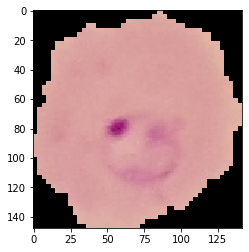

In [86]:
plt.imshow(imread(par_cell))

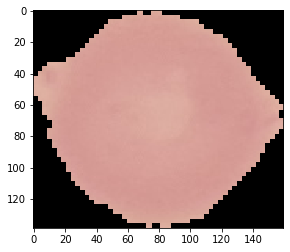

In [87]:
uninfected_cell=train_path+'uninfected\\'+os.listdir(train_path+'uninfected')[0]
plt.imshow(imread(uninfected_cell))

In [88]:
print(len(os.listdir(train_path+'uninfected')))
print(len(os.listdir(train_path+'parasitized')))
print(len(os.listdir(test_path+'uninfected')))
print(len(os.listdir(test_path+'parasitized')))

12480
12480
1300
1300


In [89]:
dim1=[]
dim2=[]
for image_filename in os.listdir(train_path+'uninfected'):
    if (image_filename!='Thumbs.db'):
            img = imread(train_path+'uninfected\\'+image_filename)
            d1,d2,colors=img.shape
            dim1.append(d1)
            dim2.append(d2)

In [90]:
print(dim1[0:4])
print(dim2[0:4])

[139, 136, 142, 112]
[160, 145, 145, 100]


In [91]:
img_shape=(np.mean(dim1),np.mean(dim2),colors)

In [92]:
img_shape

(131.64820899110507, 131.4041990544114, 3)

In [93]:
img_shape=(132,132,3)

In [96]:
img_gen=ImageDataGenerator(rotation_range=20,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1,
                          horizontal_flip=True,vertical_flip=True,fill_mode='nearest')

In [102]:
par_cell=imread(par_cell)

In [103]:
uninfected_cell=imread(uninfected_cell)

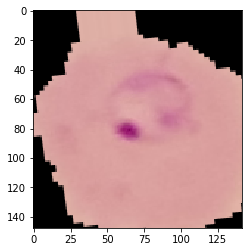

In [104]:
plt.imshow(img_gen.random_transform(par_cell))

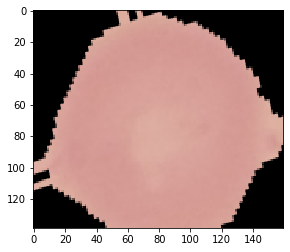

In [105]:
plt.imshow(img_gen.random_transform(uninfected_cell))

In [106]:
train_img_gen=img_gen.flow_from_directory(train_path,target_size=img_shape[0:2],batch_size=100,shuffle=True,color_mode='rgb',
                             class_mode='categorical')

Found 24958 images belonging to 2 classes.


In [118]:
test_img_gen=img_gen.flow_from_directory(test_path,target_size=img_shape[0:2],batch_size=100,shuffle=False,color_mode='rgb',
                             class_mode='categorical')

Found 2600 images belonging to 2 classes.


In [108]:
from tensorflow.keras import activations
from keras.layers.normalization import BatchNormalization
from keras import layers
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [109]:
#VGG16 architechture
model=Sequential()
model.add(Conv2D(input_shape=img_shape,filters=64,kernel_size=(3,3),padding='same'))
model.add(BatchNormalization())
model.add(layers.Activation(activations.relu))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same'))
model.add(BatchNormalization())
model.add(layers.Activation(activations.relu))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same'))
model.add(BatchNormalization())
model.add(layers.Activation(activations.relu))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same'))
model.add(BatchNormalization())
model.add(layers.Activation(activations.relu))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same'))
model.add(BatchNormalization())
model.add(layers.Activation(activations.relu))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same'))
model.add(BatchNormalization())
model.add(layers.Activation(activations.relu))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same'))
model.add(BatchNormalization())
model.add(layers.Activation(activations.relu))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(2,activation='softmax'))

In [143]:
#model=Sequential()
#model.add(Conv2D(input_shape=img_shape,filters=32,kernel_size=(3,3),padding='same',activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Flatten())
#model.add(Dense(128))
#model.add(Dropout(0.5))

#model.add(Dense(2,activation='softmax'))

In [149]:
#model = Sequential()

#model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=img_shape))
model.add(AveragePooling2D())

#model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())

#model.add(Flatten())

#model.add(Dense(units=120, activation='relu'))

#model.add(Dense(units=84, activation='relu'))

#model.add(Dense(units=2, activation = 'softmax'))

In [122]:
from keras.optimizers import Adam

In [150]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

In [151]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 130, 130, 6)       168       
_________________________________________________________________
average_pooling2d_1 (Average (None, 65, 65, 6)         0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 63, 63, 16)        880       
_________________________________________________________________
average_pooling2d_2 (Average (None, 31, 31, 16)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 15376)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 120)               1845240   
_________________________________________________________________
dense_16 (Dense)             (None, 84)               

In [152]:
from keras import callbacks
from keras.callbacks import EarlyStopping

In [153]:
callback=EarlyStopping(monitor='val_loss',patience=2,mode=min,verbose=0)

In [154]:
infec_model=model.fit_generator(train_img_gen,epochs=20,callbacks=[callback])

Epoch 1/20
250/250 [==============================] - 134s 537ms/step - loss: 3.8380 - accuracy: 0.6832
Epoch 2/20
250/250 [==============================] - 131s 525ms/step - loss: 0.3176 - accuracy: 0.8863
Epoch 3/20
250/250 [==============================] - 333s 1s/step - loss: 0.2513 - accuracy: 0.9175
Epoch 4/20
250/250 [==============================] - 350s 1s/step - loss: 0.2362 - accuracy: 0.9239
Epoch 5/20
250/250 [==============================] - 360s 1s/step - loss: 0.2197 - accuracy: 0.9274
Epoch 6/20
250/250 [==============================] - 166s 665ms/step - loss: 0.2070 - accuracy: 0.9314
Epoch 7/20
250/250 [==============================] - 137s 548ms/step - loss: 0.1943 - accuracy: 0.9336
Epoch 8/20
250/250 [==============================] - 133s 530ms/step - loss: 0.1982 - accuracy: 0.9337
Epoch 9/20
250/250 [==============================] - 131s 525ms/step - loss: 0.1905 - accuracy: 0.9349
Epoch 10/20
250/250 [==============================] - 132s 528ms/step - 

In [155]:
model.evaluate_generator(test_img_gen)

[0.26760920882225037, 0.9388461709022522]

In [299]:
test_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [157]:
predictions=model.predict(test_img_gen)

In [160]:
predictions=np.argmax(np.round(predictions),axis=1)

In [165]:
from sklearn.metrics import classification_report 

In [166]:
test_img_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [173]:
test_img_gen.classes.shape

(2600,)

In [175]:
print(classification_report(test_img_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1300
           1       0.93      0.95      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



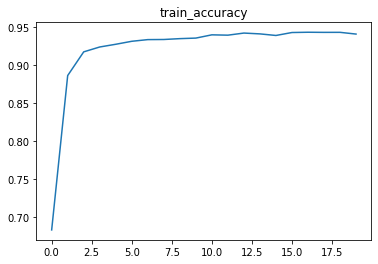

In [198]:
plt.figure()
train_accuracy=infec_model.history['accuracy']
epochs=range(len(train_accuracy))
plt.plot(epochs,train_accuracy)
plt.title('train_accuracy')
plt.show()

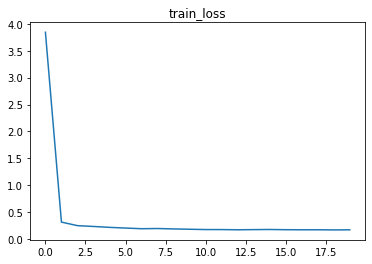

In [199]:
train_loss=infec_model.history['loss']
plt.plot(epochs,train_loss,label='train_loss')
plt.title('train_loss')
plt.show()

In [234]:
from keras.preprocessing.image import load_img,img_to_array

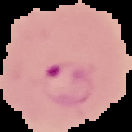

In [244]:
my_img=load_img(par_cell,target_size=img_shape)

In [235]:
my_img_array=img_to_array(my_img)

In [236]:
my_img_array=np.expand_dims(my_img_array,axis=0)

In [237]:
my_img_array.shape

(1, 132, 132, 3)

In [280]:
pred_img=model.predict(my_img_array)

In [282]:
pred_img=np.argmax(np.round(pred_img),axis=1)


[0]


In [ ]:
plt.figure(figsize=(10,10))
for i in range(0,12):
    plt.subplot(3,4,i+1)
    img_path=train_path+'parasitized\\'+os.listdir(train_path+'parasitized')[i]
    img=load_img(img_path,target_size=img_shape)
    img_array=img_to_array(img)
    img_array=np.expand_dims(img_array,axis=0)
    pred_label=model.predict(img_array)
    pred_label=np.argmax(np.round(pred_img),axis=1)
    plt.imshow(imread(img_path))
    plt.title("label:{} , pred_label{}".format(0,pred_label))
    plt.axis('off')

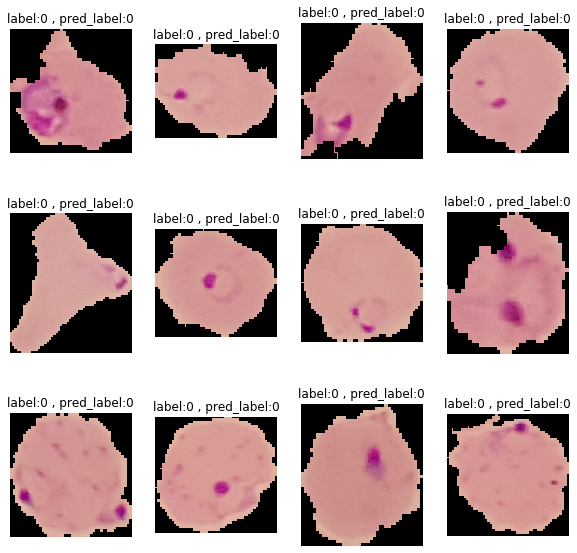

In [317]:
plt.figure(figsize=(10,10))
for i in range(0,12):
    plt.subplot(3,4,i+1)
    img_path=test_path+'parasitized\\'+os.listdir(test_path+'parasitized')[i]
    plt.imshow(imread(img_path))
    plt.title("label:{} , pred_label:{}".format(0,predictions[i]))
    plt.axis('off')

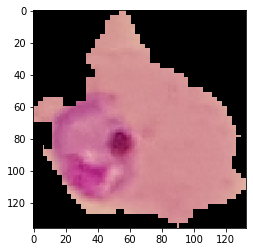

In [287]:
#plt.imshow(imread(test_path+'parasitized\\'+os.listdir(test_path+'parasitized')[0]))